#Tugas KNN

#Pengambilan Data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

data = yf.download("PTBA.JK", start = "2017-01-01", end = "2023-12-31", auto_adjust=False, multi_level_index=False)
data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-02,880.185730,2500.0,2500.0,2500.0,2500.0,0
2017-01-03,899.549866,2555.0,2565.0,2475.0,2495.0,10855500
2017-01-04,871.383850,2475.0,2525.0,2470.0,2515.0,14496500
2017-01-05,848.498962,2410.0,2500.0,2400.0,2460.0,12154000
2017-01-06,864.342285,2455.0,2475.0,2410.0,2410.0,11847000
...,...,...,...,...,...,...
2023-12-21,2056.943848,2380.0,2390.0,2350.0,2370.0,6161100
2023-12-22,2074.229004,2400.0,2410.0,2380.0,2390.0,7311600
2023-12-27,2108.799561,2440.0,2450.0,2400.0,2400.0,10653600


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1746 entries, 2017-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1746 non-null   float64
 1   Close      1746 non-null   float64
 2   High       1746 non-null   float64
 3   Low        1746 non-null   float64
 4   Open       1746 non-null   float64
 5   Volume     1746 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 95.5 KB


In [3]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1.746000e+03
mean,1470.934788,2979.673540,3027.711913,2940.518328,2985.260596,3.075455e+07
std,543.937643,776.500457,784.265241,767.977214,775.730604,3.179550e+07
min,646.721802,1485.000000,1590.000000,1385.000000,1485.000000,0.000000e+00
25%,1035.058350,2340.000000,2370.000000,2300.000000,2350.000000,1.302502e+07
50%,1332.638916,2740.000000,2780.000000,2702.500000,2750.000000,2.176365e+07
75%,1819.581451,3700.000000,3770.000000,3677.500000,3710.000000,3.622152e+07
max,2722.425537,4890.000000,5025.000000,4830.000000,4950.000000,3.644816e+08


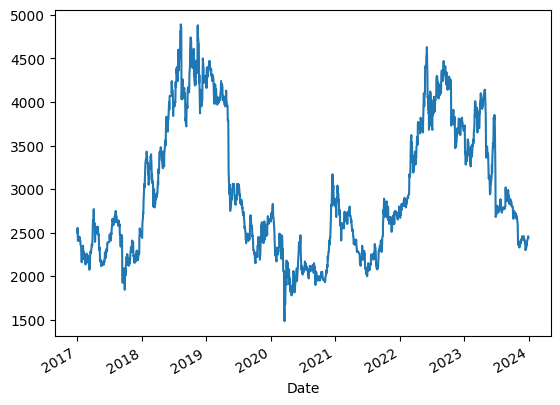

In [4]:
import matplotlib.pyplot as plt
data.Close.plot()
plt.show()

In [5]:
data['Return'] = data['Close'].pct_change()*100
data

,Adj Close,Close,High,Low,Open,Volume,Return
Date,,,,,,,
2017-01-02,880.185730,2500.0,2500.0,2500.0,2500.0,0,NaN
2017-01-03,899.549866,2555.0,2565.0,2475.0,2495.0,10855500,2.200000
2017-01-04,871.383850,2475.0,2525.0,2470.0,2515.0,14496500,-3.131115
2017-01-05,848.498962,2410.0,2500.0,2400.0,2460.0,12154000,-2.626263
2017-01-06,864.342285,2455.0,2475.0,2410.0,2410.0,11847000,1.867220
...,...,...,...,...,...,...,...
2023-12-21,2056.943848,2380.0,2390.0,2350.0,2370.0,6161100,0.847458
2023-12-22,2074.229004,2400.0,2410.0,2380.0,2390.0,7311600,0.840336
2023-12-27,2108.799561,2440.0,2450.0,2400.0,2400.0,10653600,1.666667


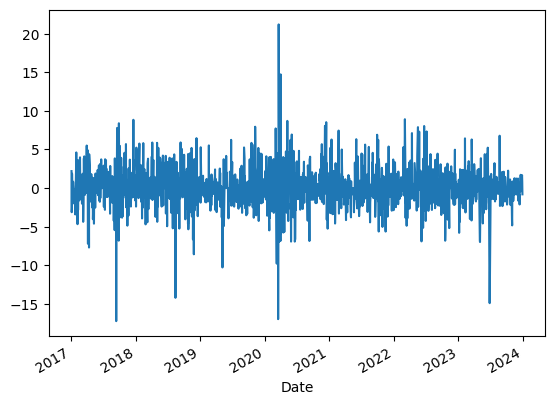

In [6]:
data.Return.plot()
plt.show()

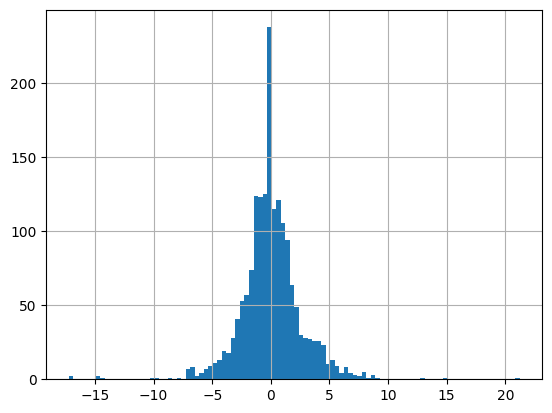

In [7]:
data.Return.hist(bins=100)
plt.show()

#Pelabelan

In [8]:
data['Close10DaysAhead'] = data['Close'].shift(-10)
data

,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead
Date,,,,,,,,
2017-01-02,880.185730,2500.0,2500.0,2500.0,2500.0,0,NaN,2440.0
2017-01-03,899.549866,2555.0,2565.0,2475.0,2495.0,10855500,2.200000,2415.0
2017-01-04,871.383850,2475.0,2525.0,2470.0,2515.0,14496500,-3.131115,2410.0
2017-01-05,848.498962,2410.0,2500.0,2400.0,2460.0,12154000,-2.626263,2405.0
2017-01-06,864.342285,2455.0,2475.0,2410.0,2410.0,11847000,1.867220,2360.0
...,...,...,...,...,...,...,...,...
2023-12-21,2056.943848,2380.0,2390.0,2350.0,2370.0,6161100,0.847458,NaN
2023-12-22,2074.229004,2400.0,2410.0,2380.0,2390.0,7311600,0.840336,NaN
2023-12-27,2108.799561,2440.0,2450.0,2400.0,2400.0,10653600,1.666667,NaN


In [9]:
data['Label']  = np.where(data['Close10DaysAhead'] > data['Close'], "Up", "Down")
data

,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead,Label
Date,,,,,,,,,
2017-01-02,880.185730,2500.0,2500.0,2500.0,2500.0,0,NaN,2440.0,Down
2017-01-03,899.549866,2555.0,2565.0,2475.0,2495.0,10855500,2.200000,2415.0,Down
2017-01-04,871.383850,2475.0,2525.0,2470.0,2515.0,14496500,-3.131115,2410.0,Down
2017-01-05,848.498962,2410.0,2500.0,2400.0,2460.0,12154000,-2.626263,2405.0,Down
2017-01-06,864.342285,2455.0,2475.0,2410.0,2410.0,11847000,1.867220,2360.0,Down
...,...,...,...,...,...,...,...,...,...
2023-12-21,2056.943848,2380.0,2390.0,2350.0,2370.0,6161100,0.847458,NaN,Down
2023-12-22,2074.229004,2400.0,2410.0,2380.0,2390.0,7311600,0.840336,NaN,Down
2023-12-27,2108.799561,2440.0,2450.0,2400.0,2400.0,10653600,1.666667,NaN,Down


In [10]:
data.Label.value_counts()

,count
Label,
Up,882
Down,864


#Analisas Teknikal

In [11]:
!pip install pandas-ta
import pandas_ta as ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=1eac1e1c221c9051b2671584d5f819b7d50a46271a13b53a667657c1a7512482
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas-ta


In [12]:
data['RSI14'] = ta.rsi(data['Close'], length=14)
macd = ta.macd(data['Close'])
data['MACD'] = macd['MACD_12_26_9']
data['EMA8'] = ta.ema(data['Close'], length=8)
data['EMA20'] = ta.ema(data['Close'], length=20)
data['EMA50'] = ta.ema(data['Close'], length=50)
# data.info()
data.describe()

,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead,RSI14,MACD,EMA8,EMA20,EMA50
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1.746000e+03,1745.000000,1736.000000,1732.000000,1721.000000,1739.000000,1727.000000,1697.000000
mean,1470.934788,2979.673540,3027.711913,2940.518328,2985.260596,3.075455e+07,0.032470,2982.710253,49.834907,-0.045499,2981.879477,2986.143142,2997.088353
std,543.937643,776.500457,784.265241,767.977214,775.730604,3.179550e+07,2.598838,777.692376,12.972911,81.629520,769.246503,759.409240,736.793137
min,646.721802,1485.000000,1590.000000,1385.000000,1485.000000,0.000000e+00,-17.248460,1485.000000,11.164151,-325.151830,1804.547260,1894.139008,1990.615000
25%,1035.058350,2340.000000,2370.000000,2300.000000,2350.000000,1.302502e+07,-1.275510,2340.000000,41.487647,-48.500109,2331.923363,2341.942766,2394.033977
50%,1332.638916,2740.000000,2780.000000,2702.500000,2750.000000,2.176365e+07,0.000000,2750.000000,49.815631,-5.033989,2739.497033,2729.755876,2705.969622
75%,1819.581451,3700.000000,3770.000000,3677.500000,3710.000000,3.622152e+07,1.184834,3710.000000,57.726184,47.784191,3704.352457,3704.870036,3701.983334
max,2722.425537,4890.000000,5025.000000,4830.000000,4950.000000,3.644816e+08,21.212121,4890.000000,90.392985,255.418219,4735.606875,4545.688981,4411.352088


#Normalisasi data

In [13]:
from sklearn.preprocessing import StandardScaler  #Mengubah menjadi distribusi normal

#Buat objek scaler
scaler = StandardScaler()
for col in data.columns:
  if col !='Label':
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
data

,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead,Label,RSI14,MACD,EMA8,EMA20,EMA50
Date,,,,,,,,,,,,,,
2017-01-02,-1.086371,-0.617915,-0.673067,-0.573773,-0.625732,-0.967538,NaN,-0.698048,Down,NaN,NaN,NaN,NaN,NaN
2017-01-03,-1.050761,-0.547064,-0.590163,-0.606335,-0.632180,-0.626024,0.834277,-0.730204,Down,NaN,NaN,NaN,NaN,NaN
2017-01-04,-1.102558,-0.650120,-0.641181,-0.612848,-0.606390,-0.511478,-1.217657,-0.736635,Down,NaN,NaN,NaN,NaN,NaN
2017-01-05,-1.144643,-0.733852,-0.673067,-0.704022,-0.677311,-0.585173,-1.023340,-0.743066,Down,NaN,NaN,NaN,NaN,NaN
2017-01-06,-1.115507,-0.675884,-0.704953,-0.690997,-0.741785,-0.594831,0.706191,-0.800946,Down,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,1.077655,-0.772498,-0.813366,-0.769147,-0.793364,-0.773710,0.313687,NaN,Down,-0.259102,-0.388848,-0.810213,-0.796845,-0.712759
2023-12-22,1.109442,-0.746734,-0.787857,-0.730072,-0.767575,-0.737515,0.310946,NaN,Down,0.022476,-0.325504,-0.798309,-0.794485,-0.716597
2023-12-27,1.173016,-0.695206,-0.736839,-0.704022,-0.754680,-0.632376,0.628998,NaN,Down,0.515174,-0.233059,-0.777492,-0.787332,-0.718155


In [14]:
#Ngedrop data yang Not a Number (NaN)
data = data.dropna()
dataset = data[['Close','RSI14', 'MACD', 'EMA8', 'EMA20','EMA50','Label']]
dataset

,Close,RSI14,MACD,EMA8,EMA20,EMA50,Label
Date,,,,,,,
2017-03-10,-1.165399,-1.190628,-0.492495,-1.065595,-1.034397,-0.964854,Up
2017-03-13,-1.158958,-1.135902,-0.551173,-1.089409,-1.049556,-0.975843,Up
2017-03-14,-1.055902,-0.349682,-0.512656,-1.084813,-1.053236,-0.982142,Up
2017-03-15,-1.017256,-0.098026,-0.447305,-1.072570,-1.052801,-0.986596,Up
2017-03-16,-0.901318,0.542945,-0.303022,-1.037040,-1.041118,-0.986084,Up
...,...,...,...,...,...,...,...
2023-12-07,-0.720970,-0.486966,-0.315191,-0.724212,-0.724624,-0.630475,Down
2023-12-08,-0.733852,-0.608774,-0.307128,-0.728530,-0.727887,-0.637008,Down
2023-12-11,-0.785380,-1.046063,-0.336406,-0.743447,-0.735858,-0.645413,Up


<Axes: >

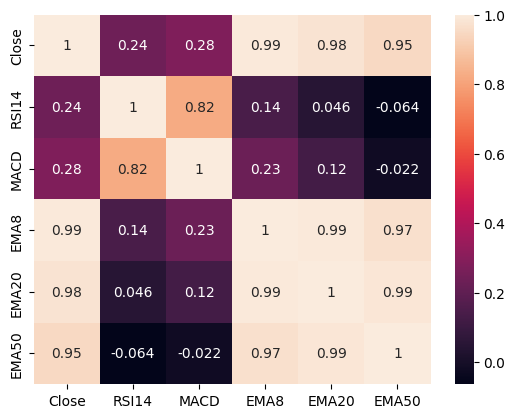

In [15]:
#Grafik korelasi, label ga bisa di heatmap
import seaborn as sns
heatmap_data = dataset[['Close','RSI14', 'MACD', 'EMA8', 'EMA20','EMA50']]
sns.heatmap(heatmap_data.corr(), annot=True)

#Model KNN

In [16]:
#Split dataset untuk training dan testing
from sklearn.model_selection import train_test_split
#KNN
from sklearn.neighbors import KNeighborsClassifier
#evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd

#Atribut
X = dataset.drop('Label', axis = 1)
#Label
Y = dataset['Label']

#Memisahkan 30% sebagai test dan sisanya sebagai train, secara random ya
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 7)

k_values = range(1, 51)      # range nilai k dari 1 sampai 50
akurasi_model = []           # untuk menyimpan akurasi tiap k

best_k = None                # inisialisasi variabel k terbaik
best_accuracy = 0.0          # inisialisasi akurasi terbaik

for k in k_values:
    # Buat objek KNN dengan k tetangga terdekat
    knn = KNeighborsClassifier(n_neighbors=k)
    # Latih model dengan data training
    knn.fit(X_train, Y_train)
    # Hitung akurasi pada data testing
    akurasi_k = knn.score(X_test, Y_test)
    # Simpan akurasi ke list
    akurasi_model.append(akurasi_k)

    # Cek apakah akurasi saat ini lebih baik dari best_accuracy
    if akurasi_k > best_accuracy:
        best_accuracy = akurasi_k
        best_k = k

# for value in akurasi_model:
#   print(value)

error_rate = (1 - np.array(akurasi_model)) * 100

# Buat DataFrame dengan dua kolom: "Nilai K" dan "Akurasi"
tabel_akurasi = pd.DataFrame(
    list(zip(k_values, akurasi_model, error_rate)),
    columns=['K', 'Akurasi', 'error rate']
)

print(tabel_akurasi)


print(f"Nilai k terbaik = {best_k} dengan akurasi = {best_accuracy}")

     K   Akurasi  error rate
0    1  0.763033   23.696682
1    2  0.781991   21.800948
2    3  0.765403   23.459716
3    4  0.722749   27.725118
4    5  0.722749   27.725118
5    6  0.699052   30.094787
6    7  0.706161   29.383886
7    8  0.689573   31.042654
8    9  0.682464   31.753555
9   10  0.682464   31.753555
10  11  0.668246   33.175355
11  12  0.677725   32.227488
12  13  0.665877   33.412322
13  14  0.663507   33.649289
14  15  0.665877   33.412322
15  16  0.651659   34.834123
16  17  0.649289   35.071090
17  18  0.654028   34.597156
18  19  0.656398   34.360190
19  20  0.651659   34.834123
20  21  0.637441   36.255924
21  22  0.623223   37.677725
22  23  0.625592   37.440758
23  24  0.632701   36.729858
24  25  0.613744   38.625592
25  26  0.606635   39.336493
26  27  0.613744   38.625592
27  28  0.620853   37.914692
28  29  0.613744   38.625592
29  30  0.620853   37.914692
30  31  0.613744   38.625592
31  32  0.609005   39.099526
32  33  0.601896   39.810427
33  34  0.6018

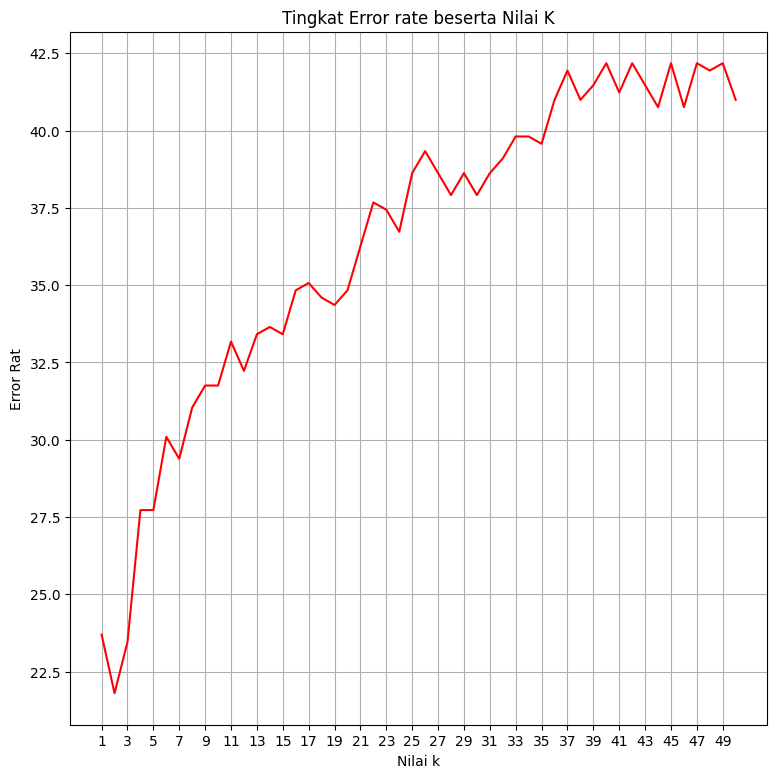

In [17]:
#Penggambaran plot nya
plt.figure(figsize=(9, 9))
plt.plot(k_values, error_rate, color='red')
plt.title('Tingkat Error rate beserta Nilai K')
plt.xlabel('Nilai k')
plt.ylabel('Error Rat')
plt.xticks(range(1,51,2))  # menampilkan ticks di plot setiap 2
plt.grid(True)
plt.show()

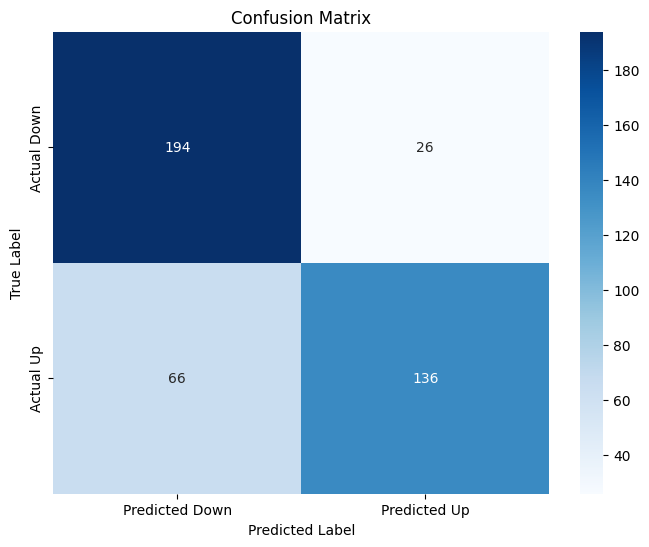

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       220
           1       0.84      0.67      0.75       202

    accuracy                           0.78       422
   macro avg       0.79      0.78      0.78       422
weighted avg       0.79      0.78      0.78       422



In [19]:
#Confussion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_test contains the true labels for the test set
# and knn is your trained KNeighborsClassifier model
# predicting on X_test and storing predictions in y_pred
threshold = 0  # Define a threshold for classification (e.g., 0)

# Initialize and train the KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)  # Assuming best_k is defined from previous code
knn.fit(X_train, Y_train)  # Fit the model to the training data

# Make predictions using the trained model
y_pred = (knn.predict(X_test) == 'Up').astype(int)  # Convert predictions to 0 or 1 based on the threshold and class labels

# Assuming Y_test contains the actual labels (0 or 1)
cm = confusion_matrix((Y_test == 'Up').astype(int), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report((Y_test == 'Up').astype(int), y_pred))